<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# DEBER EXPRESIONES REGULARES

## GBI6-2021II: BIOINFORMÁTICA

**OÑA QUILLUPANGUI ANGEL ANDRES** 



In [18]:
#subimos el archivo del tema de interes de pubmed 
import re
f = open("pubmed.txt" , encoding="utf-8") 
my_text = f.read()
print(len(my_text))

f.close()

1026382


In [19]:
# Unimos el codigo que esta separado por 6 saltos de linea en uno solo 
my_text = re.sub(r'\n\s{6}', ' ', my_text)
print(my_text[:2000])

PMID- 29366418
OWN - NLM
STAT- MEDLINE
DCOM- 20190501
LR  - 20200225
IS  - 1875-6190 (Electronic)
IS  - 1570-159X (Print)
IS  - 1570-159X (Linking)
VI  - 17
IP  - 2
DP  - 2019
TI  - Ayahuasca: Psychological and Physiologic Effects, Pharmacology and Potential Uses in  Addiction and Mental Illness.
PG  - 108-128
LID - 10.2174/1570159X16666180125095902 [doi]
AB  - BACKGROUND: Ayahuasca, a traditional Amazonian decoction with psychoactive  properties, is made from bark of the Banisteriopsis caapi vine (containing  beta-carboline alkaloids) and leaves of the Psychotria viridis bush (supplying the  hallucinogen N,N-dimethyltryptamine, DMT). Originally used by indigenous shamans for  the purposes of spirit communication, magical experiences, healing, and religious  rituals across several South American countries, ayahuasca has been incorporated  into folk medicine and spiritual healing, and several Brazilian churches use it  routinely to foster a spiritual experience. More recently, it is bei

In [20]:
# Escribimos la expresion regular 
#Delimitamos (,) y salto de un espacio (\s) antes de que comienze un pais siempre tiene una coma y espacio en blanco 
#Extraemos informacion [A-Z] es porque un pais comienza siempre con mayuscula, 
#(+)tomamos todos los valos posibles [a-z] solo en minusculas
#{1,15} delimitamos el numero de caracteres para un pais que maximo 15
#.\ delimitamos el fin del pais que es siempre con un punto 
paises = re.findall(r',\s([A-Z]+[a-z]{1,15})\.', my_text)
print (paises)

['Canada', 'Canada', 'Brazil', 'Canada', 'Canada', 'Spain', 'Spain', 'Brazil', 'Canada', 'Canada', 'Portugal', 'Portugal', 'Portugal', 'Portugal', 'Portugal', 'Portugal', 'Portugal', 'Portugal', 'Portugal', 'Portugal', 'Col', 'Mexico', 'Col', 'Mexico', 'Col', 'Mexico', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Calif', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Estonia', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Av', 'Brazil', 'Av', 'Brazil', 'Av', 'Brazil', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazi

In [21]:
import pandas as pd
%matplotlib inline

Coordenadas = pd.read_csv('cordena.csv', engine='python', skipfooter=3)
Coordenadas.head(10)

,latitude,longitude,name
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
5,41.153332,20.168331,Albania
6,40.069099,45.038189,Armenia
7,12.226079,-69.060087,Netherlands Antilles
8,-11.202692,17.873887,Angola
9,-75.250973,-0.071389,Antarctica


In [22]:
Coordenadas.columns = ["Latitud", "Longitud", "Nombre"]
Coordenadas.head(10)

,Latitud,Longitud,Nombre
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
5,41.153332,20.168331,Albania
6,40.069099,45.038189,Armenia
7,12.226079,-69.060087,Netherlands Antilles
8,-11.202692,17.873887,Angola
9,-75.250973,-0.071389,Antarctica


In [27]:
datos_nombre = Coordenadas[Coordenadas.Nombre.isin(paises)]
all_data =pd.concat([datos_nombre]).drop_duplicates().sort_values('Nombre')
all_data.head(10)
                

,Latitud,Longitud,Nombre
10,-38.416097,-63.616672,Argentina
13,-25.274398,133.775136,Australia
12,47.516231,14.550072,Austria
27,-16.290154,-63.588653,Bolivia
28,-14.235004,-51.925280,Brazil
35,56.130366,-106.346771,Canada
43,-35.675147,-71.542969,Chile
45,35.861660,104.195397,China
46,4.570868,-74.297333,Colombia
59,-1.831239,-78.183406,Ecuador


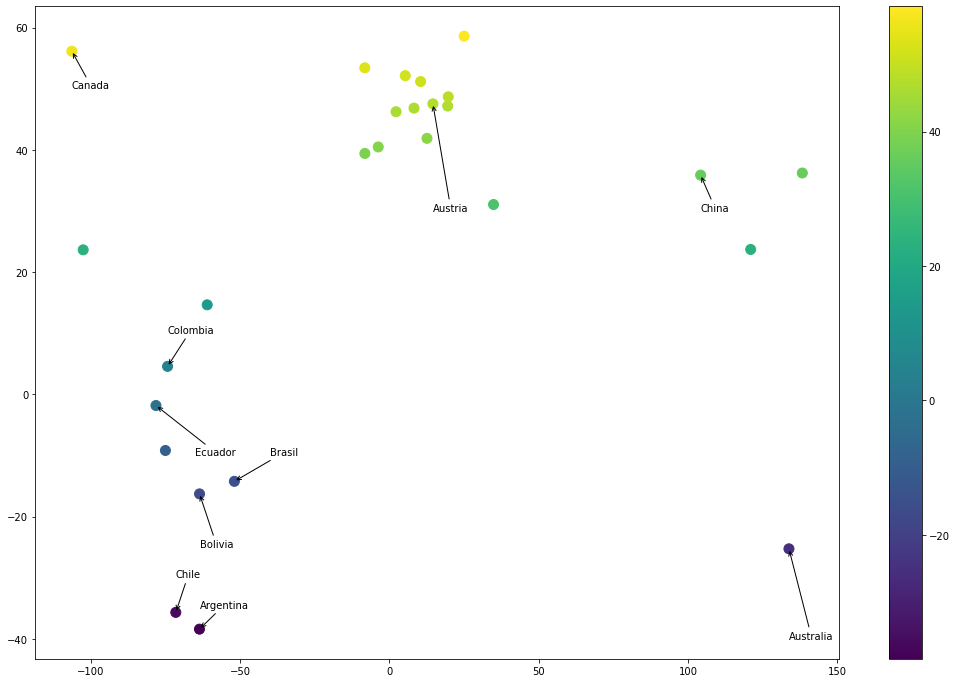

In [71]:
import matplotlib.pyplot as plt
plt.scatter(all_data.Longitud, all_data.Latitud, s=100, c=all_data.Latitud)
plt.colorbar()

ard = dict(arrowstyle="->")
plt.annotate('Bolivia', xy = (-63.588653,-16.290154), 
               xytext = (-63.588653, -25), arrowprops= ard)
plt.annotate('Colombia', xy = (-74.297333, 4.570868	), 
               xytext = (-74.297333, 10), arrowprops= ard)
plt.annotate('Argentina', xy = (-63.616672, -38.416097), 
               xytext = (-63.616672,-35 ), arrowprops = ard)
plt.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -40), arrowprops= ard)
plt.annotate('Austria', xy = (14.550072, 47.516231), 
               xytext = (14.550072, 30), arrowprops= ard)
plt.annotate('Ecuador', xy = (-78.183406, -1.831239), 
               xytext = (-65, -10), arrowprops= ard)
plt.annotate('Canada', xy = (-106.346771, 56.130366), 
               xytext = (-106.346771, 50), arrowprops= ard)
plt.annotate('China', xy = ( 104.195397, 35.861660), 
               xytext = (104.195397, 30), arrowprops= ard)
plt.annotate('Chile', xy = (-71.542969, -35.675147), 
               xytext = (-71.542969, -30), arrowprops= ard)
plt.annotate('Brasil', xy = (-51.925280, -14.235004), 
               xytext = (-40, -10), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )

plt.savefig("Map of Science.png")